In [1]:
from bs4 import BeautifulSoup

import json

import requests

import pandas as pd


# Use a pipeline as a high-level helper
from transformers import pipeline


C:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# url = 'https://4dayweek.io/remote-jobs/north-america'

url = 'https://4dayweek.io/remote-jobs/north-america/engineering'

webPage = requests.get( url )

In [3]:
webPage

<Response [200]>

In [4]:
BeautifulSoup( webPage.text, 'html' )

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1,maximum-scale=6" name="viewport"/><base href="/"/><link href="/manifest.json" rel="manifest"/><meta content="#f40053" name="theme-color"/><script>window.__PRELOADED_STATE__ = {"item":{"new":{"requested":false,"loading":false,"response":{}},"get":{"requested":false,"loading":false,"response":{}},"set":{"requested":false,"loading":false,"response":{}},"advert":{"requested":false,"loading":false,"response":{}}},"user":{"login":{"requested":false,"loading":false,"response":{}}},"list":{"jobs_company":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_home":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_list":{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\n### Summary\n\n-   Senior Full Stack 

In [5]:
bSoup = BeautifulSoup( webPage.text, 'html' )

In [6]:
bSoup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1,maximum-scale=6" name="viewport"/><base href="/"/><link href="/manifest.json" rel="manifest"/><meta content="#f40053" name="theme-color"/><script>window.__PRELOADED_STATE__ = {"item":{"new":{"requested":false,"loading":false,"response":{}},"get":{"requested":false,"loading":false,"response":{}},"set":{"requested":false,"loading":false,"response":{}},"advert":{"requested":false,"loading":false,"response":{}}},"user":{"login":{"requested":false,"loading":false,"response":{}}},"list":{"jobs_company":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_home":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_list":{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\n### Summary\n\n-   Senior Full Stack 

In [7]:
bSoup.find_all( 'script')

[<script>window.__PRELOADED_STATE__ = {"item":{"new":{"requested":false,"loading":false,"response":{}},"get":{"requested":false,"loading":false,"response":{}},"set":{"requested":false,"loading":false,"response":{}},"advert":{"requested":false,"loading":false,"response":{}}},"user":{"login":{"requested":false,"loading":false,"response":{}}},"list":{"jobs_company":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_home":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_list":{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\n### Summary\n\n-   Senior Full Stack Software Engineer with Elixir experience\n-   130k-150k + equity\n-   Remote, 4-day work week\n-   Proptech experience desired\n-   Preference for candidates in Colorado area\n\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the 

In [8]:
bSoup2 = BeautifulSoup( webPage.content, 'html.parser' )
bSoup2

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1,maximum-scale=6" name="viewport"/><base href="/"/><link href="/manifest.json" rel="manifest"/><meta content="#f40053" name="theme-color"/><script>window.__PRELOADED_STATE__ = {"item":{"new":{"requested":false,"loading":false,"response":{}},"get":{"requested":false,"loading":false,"response":{}},"set":{"requested":false,"loading":false,"response":{}},"advert":{"requested":false,"loading":false,"response":{}}},"user":{"login":{"requested":false,"loading":false,"response":{}}},"list":{"jobs_company":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_home":{"items":{},"itemIds":[],"newItemIds":[],"loading":false,"init":false,"lastRequest":{}},"jobs_list":{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\n### Summary\n\n-   Senior Full Stack 

In [9]:
scriptTag[0].text[557:126611]

NameError: name 'scriptTag' is not defined

In [11]:
scriptTag = bSoup2.find_all( 'script')
scriptTag[0].text[556:126611]

'{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\\n### Summary\\n\\n-   Senior Full Stack Software Engineer with Elixir experience\\n-   130k-150k + equity\\n-   Remote, 4-day work week\\n-   Proptech experience desired\\n-   Preference for candidates in Colorado area\\n\\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**\\n\\n### About Privy\\n\\nPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.\\n\\n### The Opportunity\\n\\nWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our application and take

##### Separating the jobs_list JSON Object

In [12]:
scriptTag = bSoup2.find_all( 'script')
scriptTag[0].text[545:126611]

'jobs_list":{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\\n### Summary\\n\\n-   Senior Full Stack Software Engineer with Elixir experience\\n-   130k-150k + equity\\n-   Remote, 4-day work week\\n-   Proptech experience desired\\n-   Preference for candidates in Colorado area\\n\\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**\\n\\n### About Privy\\n\\nPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.\\n\\n### The Opportunity\\n\\nWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our applicati

In [14]:
scriptTag = bSoup2.find_all( 'script')
scriptTag[0].text[556:126424]

'{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\\n### Summary\\n\\n-   Senior Full Stack Software Engineer with Elixir experience\\n-   130k-150k + equity\\n-   Remote, 4-day work week\\n-   Proptech experience desired\\n-   Preference for candidates in Colorado area\\n\\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**\\n\\n### About Privy\\n\\nPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.\\n\\n### The Opportunity\\n\\nWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our application and take

In [15]:
json_op = json.loads( scriptTag[0].text[556:126611] )
print( 'Type: ', type(json_op), ' -- \n', json_op )

Type:  <class 'dict'>  -- 
 {'items': {'7360': {'title': 'Senior Full Stack Software Engineer, Elixir, Rails', 'description': "\n### Summary\n\n-   Senior Full Stack Software Engineer with Elixir experience\n-   130k-150k + equity\n-   Remote, 4-day work week\n-   Proptech experience desired\n-   Preference for candidates in Colorado area\n\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**\n\n### About Privy\n\nPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.\n\n### The Opportunity\n\nWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our appli

In [16]:
df = pd.read_json( json_op )
df

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [17]:
df

NameError: name 'df' is not defined

In [18]:
scriptTag[0].text[556:126611] 

'{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\\n### Summary\\n\\n-   Senior Full Stack Software Engineer with Elixir experience\\n-   130k-150k + equity\\n-   Remote, 4-day work week\\n-   Proptech experience desired\\n-   Preference for candidates in Colorado area\\n\\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**\\n\\n### About Privy\\n\\nPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.\\n\\n### The Opportunity\\n\\nWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our application and take

In [19]:
scriptTag = bSoup2.find_all( 'script')
scriptTag[0].text[556:126611].replace('\\n','')

'{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"### Summary-   Senior Full Stack Software Engineer with Elixir experience-   130k-150k + equity-   Remote, 4-day work week-   Proptech experience desired-   Preference for candidates in Colorado area**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**### About PrivyPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.### The OpportunityWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our application and take it to the next level. We’re looking for talented e

In [20]:
scriptTag.find_all('jobs_list')

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [21]:
scriptTag[0].text[556:126611]

'{"items":{"7360":{"title":"Senior Full Stack Software Engineer, Elixir, Rails","description":"\\n### Summary\\n\\n-   Senior Full Stack Software Engineer with Elixir experience\\n-   130k-150k + equity\\n-   Remote, 4-day work week\\n-   Proptech experience desired\\n-   Preference for candidates in Colorado area\\n\\n**A ground-floor engineering opportunity at a profitable SaaS startup experiencing rapid adoption and revenue growth in the proptech space.**\\n\\n### About Privy\\n\\nPrivy is the premier subscription-based SaaS platform and community that Real Estate agents and investors engage with in their Real Estate investment property journey. Privy curates and analyzes massive amounts of property, mortgage, rental and Multiple Listing Service (MLS) data and sends profitable deals automatically to its user base.\\n\\n### The Opportunity\\n\\nWe’ve proven our model and are looking to build our core product and engineering teams in the coming months to scale our application and take

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("token-classification", model="ml6team/keyphrase-extraction-kbir-inspec")
pipe( scriptTag[0].text[556:126611] )

In [ ]:
from transformers import (
    TokenClassificationPipeline,
    AutoModelForTokenClassification,
    AutoTokenizer,
)
from transformers.pipelines import AggregationStrategy
import numpy as np

# Define keyphrase extraction pipeline
class KeyphraseExtractionPipeline(TokenClassificationPipeline):
    def __init__(self, model, *args, **kwargs):
        super().__init__(
            model=AutoModelForTokenClassification.from_pretrained(model),
            tokenizer=AutoTokenizer.from_pretrained(model),
            *args,
            **kwargs
        )

    def postprocess(self, all_outputs):
        results = super().postprocess(
            all_outputs=all_outputs,
            aggregation_strategy=AggregationStrategy.SIMPLE,
        )

        print( '--', all_outputs )

        print( results )
        # print( np.unique([result.get("word").strip() for result in results]) )
        
        return np.unique([result.get("word").strip() for result in results])


# Load pipeline
model_name = "ml6team/keyphrase-extraction-kbir-inspec"
extractor = KeyphraseExtractionPipeline(model=model_name)


keyPhrases = extractor( scriptTag[0].text[556:126611].replace('\\n','') )

keyPhrases

In [ ]:
pipe = pipeline("text-classification", model="Nalenczewski/keyword_category_classifier")

pipe( scriptTag[0].text[556:20000].replace('\\n','') )

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer((scriptTag[0].text[556:20000].replace('\\n','')), padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print( sentence_embeddings )

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="cross-encoder/mmarco-mMiniLMv2-L12-H384-v1")
pipe( scriptTag[0].text[556:900].replace('\\n','') )

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("token-classification", model="jjzha/jobbert_skill_extraction")
pipe( scriptTag[0].text[556:900].replace('\\n','') )

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="jjzha/jobbert-base-cased")

# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("jjzha/jobbert-base-cased")
model = AutoModelForMaskedLM.from_pretrained("jjzha/jobbert-base-cased")
model.


In [ ]:
from transformers import pipeline

token_skill_classifier = pipeline(model="jjzha/jobbert_skill_extraction", aggregation_strategy="first")
token_knowledge_classifier = pipeline(model="jjzha/jobbert_knowledge_extraction", aggregation_strategy="first")


examples = scriptTag[0].text[556:126611].replace('\\n','')


def aggregate_span(results):
    new_results = []
    current_result = results[0]

    for result in results[1:]:
        if result["start"] == current_result["end"] + 1:
            current_result["word"] += " " + result["word"]
            current_result["end"] = result["end"]
        else:
            new_results.append(current_result)
            current_result = result

    new_results.append(current_result)

    return new_results


def ner(text):
    output_skills = token_skill_classifier(text)
    for result in output_skills:
        if result.get("entity_group"):
            result["entity"] = "Skill"
            del result["entity_group"]

    output_knowledge = token_knowledge_classifier(text)
    for result in output_knowledge:
        if result.get("entity_group"):
            result["entity"] = "Knowledge"
            del result["entity_group"]

    if len(output_skills) > 0:
        output_skills = aggregate_span(output_skills)
    if len(output_knowledge) > 0:
        output_knowledge = aggregate_span(output_knowledge)

    return {"text": text, "entities": output_skills}, {"text": text, "entities": output_knowledge}

In [ ]:
ner( scriptTag[0].text[556:2500].replace('\\n','') )

In [ ]:
import re
from collections import Counter

def extract_skills(text):
    # List of skills to look for
    skills = ['Python', 'Java', 'C++', 'JavaScript', 'SQL', 'React', 'Node', 'GraphQL']
    
    # Find all the skills in the text
    skill_counts = Counter(re.findall(r'\b(?:{})\b'.format('|'.join(skills)), text, re.IGNORECASE))
    
    return skill_counts

# text = "We are looking for a Python developer with experience in Java and C++. The candidate should also have knowledge of SQL."
print(extract_skills( scriptTag[0].text[556:126611].replace('\\n','') ))


In [10]:
scriptTag[0].text[556:126611].replace('\\n','')

NameError: name 'scriptTag' is not defined

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Provided string containing job skills
input_string = "Skills: Python, Java, SQL, Machine Learning, Communication, Problem Solving"

# Extracting skills using regular expression
skills = re.findall(r'\b\w+\b', scriptTag[0].text[556:126611].replace('\\n','') )

print( skills )
# Removing non-skill words (such as 'Skills')
skills = [skill for skill in skills if skill.lower() != 'skills']

# Creating a Pandas DataFrame
data = {'Skills': skills}
print( data )

df = pd.DataFrame(data)

# Counting the occurrences of each skill
skill_counts = df['Skills'].value_counts()

# # Visualizing the data
# plt.figure(figsize=(10, 6))
# skill_counts.plot(kind='bar')
# plt.title('Job Skills')
# plt.xlabel('Skills')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
skill_counts

{'SQL': 3, 'Python': 5, 'JavaScript': 4, 'GraphQL': 1, 'React': 9, 'API': 14, 'AWS': 6, 'Cloud': 7, 'Django': 3, 'Elixir': 5, 'Ruby': 2, 'Next': 0}
{'Skill': ['SQL', 'Python', 'JavaScript', 'GraphQL', 'React', 'API', 'AWS', 'Cloud', 'Django', 'Elixir', 'Ruby', 'Next'], 'Count': [3, 5, 4, 1, 9, 14, 6, 7, 3, 5, 2, 0]}


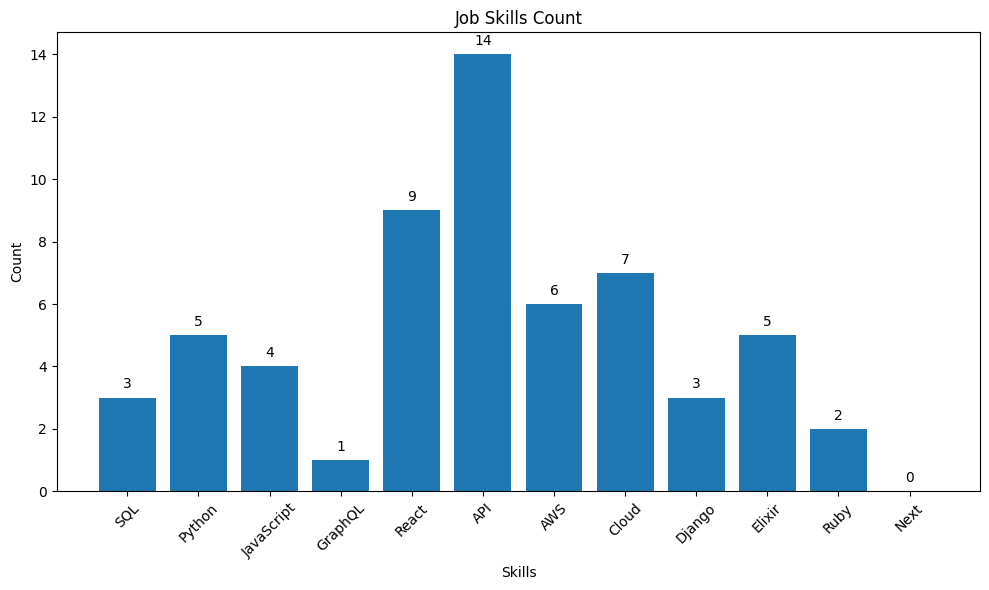

In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Get the user-provided input string
# input_string = input("Enter the job skills separated by commas: ")

# Extracting skills using regular expression
skills = re.findall(r'\b\w+\b', scriptTag[0].text[556:126611].replace('\\n','') )

# List of predefined skills for counting
predefined_skills = ['SQL', 'Python', 'JavaScript', 'GraphQL', 'React', 'API', 'AWS' , 'Cloud', 'Django', 'Elixir', 'Ruby', 'Next' ]

# Filtering and counting predefined skills
skill_counts = {skill: skills.count(skill) for skill in predefined_skills}


print( skill_counts ) 

# Creating a Pandas DataFrame
data = {'Skill': list(skill_counts.keys()), 'Count': list(skill_counts.values())}
print( data ) 

df = pd.DataFrame(data)

# Visualizing the data
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Skill'], df['Count'])
plt.title('Job Skills Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
type( skills )

In [23]:
url2 = 'https://4dayweek.io/remote-jobs/data-analyst'

webPage2 = requests.get( url2 )

bSoup3 = BeautifulSoup( webPage2.content, 'html.parser' )

scriptTag2 = bSoup3.find_all( 'script')
#scriptTag2
scriptTag2[0].text[556:29472]

# len( scriptTag2[0].text )

'{"items":{"7102":{"title":"Salesforce Data Analyst","description":"**Purpose of Position**\\n\\nThe Global Business Operations Team drives the implementation and adoption of relevant sales / service processes and tools for Awin customer facing teams, empowering them to be more efficient and to provide better services for Awin clients.\\n\\nAs a Salesforce Data Analyst in the Global Business Operations Team, you will\\n\\n- Support the team to baseline current state and measure the success of new releases and changes introduced.\\n- Ensure that all changes made in our Success Centers will be tracked via Google Analytics and that the business teams will have access to the Success Center reporting they need.\\n- Support the team in the definition of global KPIs and will build the reports and dashboards which will provide the insights required by business stakeholders to perform their daily work and improve the experience of Awin customers.\\n- Identify and communicate monthly and quarter

In [24]:
json_op2 = json.loads( scriptTag2[0].text[556:29472] )
print( 'Type: ', type(json_op2), ' -- \n', json_op2 )

Type:  <class 'dict'>  -- 
 {'items': {'7102': {'title': 'Salesforce Data Analyst', 'description': '**Purpose of Position**\n\nThe Global Business Operations Team drives the implementation and adoption of relevant sales / service processes and tools for Awin customer facing teams, empowering them to be more efficient and to provide better services for Awin clients.\n\nAs a Salesforce Data Analyst in the Global Business Operations Team, you will\n\n- Support the team to baseline current state and measure the success of new releases and changes introduced.\n- Ensure that all changes made in our Success Centers will be tracked via Google Analytics and that the business teams will have access to the Success Center reporting they need.\n- Support the team in the definition of global KPIs and will build the reports and dashboards which will provide the insights required by business stakeholders to perform their daily work and improve the experience of Awin customers.\n- Identify and communic

{'SQL': 4, 'Python': 2, 'Tableau': 4, 'PowerBI': 2, 'Excel': 1, 'Analytics': 5, 'AWS': 3, 'SAS': 0, 'Git': 0, 'Docker': 1, 'Ruby': 1, 'Looker': 2}
{'Skill': ['SQL', 'Python', 'Tableau', 'PowerBI', 'Excel', 'Analytics', 'AWS', 'SAS', 'Git', 'Docker', 'Ruby', 'Looker'], 'Count': [4, 2, 4, 2, 1, 5, 3, 0, 0, 1, 1, 2]}


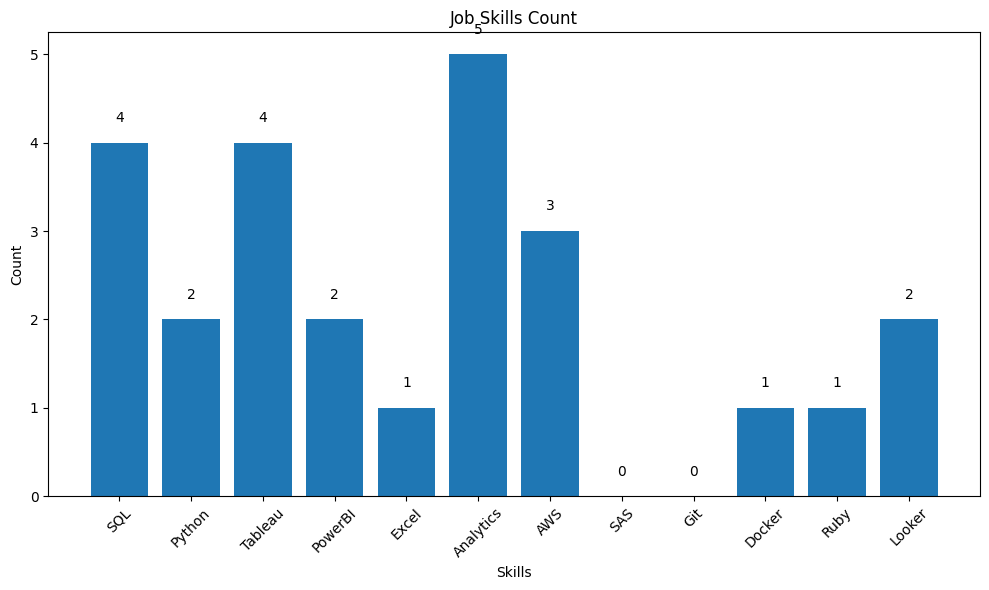

In [136]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Get the user-provided input string
# input_string = input("Enter the job skills separated by commas: ")

# Extracting skills using regular expression
skills = re.findall(r'\b\w+\b', scriptTag2[0].text[556:29472].replace('\\n','') )

# List of predefined skills for counting
predefined_skills = ['SQL', 'Python', 'Tableau', 'PowerBI', 'Excel', 'Analytics', 'AWS' ,'SAS', 'Git', 'Docker', 'Ruby', 'Looker']

# Filtering and counting predefined skills
skill_counts = {skill: skills.count(skill) for skill in predefined_skills}


print( skill_counts ) 

# Creating a Pandas DataFrame
data = {'Skill': list(skill_counts.keys()), 'Count': list(skill_counts.values())}
print( data ) 

df = pd.DataFrame(data)

# Visualizing the data
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Skill'], df['Count'])
plt.title('Job Skills Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', va='bottom', fontsize=10)

plt.show()

In [30]:
scriptTag2[0].text[556:29472]

'{"items":{"7102":{"title":"Salesforce Data Analyst","description":"**Purpose of Position**\\n\\nThe Global Business Operations Team drives the implementation and adoption of relevant sales / service processes and tools for Awin customer facing teams, empowering them to be more efficient and to provide better services for Awin clients.\\n\\nAs a Salesforce Data Analyst in the Global Business Operations Team, you will\\n\\n- Support the team to baseline current state and measure the success of new releases and changes introduced.\\n- Ensure that all changes made in our Success Centers will be tracked via Google Analytics and that the business teams will have access to the Success Center reporting they need.\\n- Support the team in the definition of global KPIs and will build the reports and dashboards which will provide the insights required by business stakeholders to perform their daily work and improve the experience of Awin customers.\\n- Identify and communicate monthly and quarter

In [27]:
len('"jobs_list":')

12

In [26]:
scriptTag2[0].text.find( '"jobs_list":' )

544

In [32]:
len( ',"id":"list"}}' )

14

In [35]:
scriptTag2[0].text.find( ',"id":"list"}}' )

29458

In [38]:
scriptTag2[0].text.find( '"itemIds":[' )

368

In [78]:
scriptTag2[0].text.replace('\\n','').find( '"itemIds":[' )

368

In [42]:
scriptTag2[0].text.replace('\\n','').find( '"jobs_list":' )

544

In [46]:
scriptTag2[0].text.replace('\\n','').find(  ',"id":"list"}}' )

29014

In [52]:
repStr = scriptTag2[0].text.replace('\\n','')

repStr[ repStr.find( '"jobs_list":' ) + len('"jobs_list":') : repStr.find(  ',"id":"list"}}' ) + len(',"id":"list"}}') ]

'{"items":{"7102":{"title":"Salesforce Data Analyst","description":"**Purpose of Position**The Global Business Operations Team drives the implementation and adoption of relevant sales / service processes and tools for Awin customer facing teams, empowering them to be more efficient and to provide better services for Awin clients.As a Salesforce Data Analyst in the Global Business Operations Team, you will- Support the team to baseline current state and measure the success of new releases and changes introduced.- Ensure that all changes made in our Success Centers will be tracked via Google Analytics and that the business teams will have access to the Success Center reporting they need.- Support the team in the definition of global KPIs and will build the reports and dashboards which will provide the insights required by business stakeholders to perform their daily work and improve the experience of Awin customers.- Identify and communicate monthly and quarterly customer insightsThis is

In [51]:
scriptTag2[0].text.replace('\\n','')[ scriptTag2[0].text.replace('\\n','').find( '"jobs_list":' ) + len('"jobs_list":') : scriptTag2[0].text.replace('\\n','').find(  ',"id":"list"}}' ) + len(',"id":"list"}}') ]

'{"items":{"7102":{"title":"Salesforce Data Analyst","description":"**Purpose of Position**The Global Business Operations Team drives the implementation and adoption of relevant sales / service processes and tools for Awin customer facing teams, empowering them to be more efficient and to provide better services for Awin clients.As a Salesforce Data Analyst in the Global Business Operations Team, you will- Support the team to baseline current state and measure the success of new releases and changes introduced.- Ensure that all changes made in our Success Centers will be tracked via Google Analytics and that the business teams will have access to the Success Center reporting they need.- Support the team in the definition of global KPIs and will build the reports and dashboards which will provide the insights required by business stakeholders to perform their daily work and improve the experience of Awin customers.- Identify and communicate monthly and quarterly customer insightsThis is

In [89]:
v = scriptTag2[0].text.replace('\\n','')[ scriptTag2[0].text.replace('\\n','').find( '"jobs_list":' ) + len('"jobs_list":') : scriptTag2[0].text.replace('\\n','').find(  ',"id":"list"}}' ) + len(',"id":"list"}}') ]

In [85]:
repStr.rfind( '"loading":false' )

31830

In [90]:
v.rfind( '"itemIds":' )

28342

In [104]:
vL = v[ v.rfind( '"itemIds":' ) : v.find(',"loading"') ].split(':')

In [108]:
len(vL[1])

21

In [130]:
vL[1]

'[9962,8059,7833,7102]'

In [114]:
type(vL[1])

str

In [129]:
v2 = vL[1].replace('[','')
v2 = v2.replace(']','')
v2 = v2.split(',')
len(v2)

4

In [121]:
[n.strip() for n in vL[1]]

['[',
 '9',
 '9',
 '6',
 '2',
 ',',
 '8',
 '0',
 '5',
 '9',
 ',',
 '7',
 '8',
 '3',
 '3',
 ',',
 '7',
 '1',
 '0',
 '2',
 ']']

In [132]:
v = json.loads( vL[1] )
print( v, ' - ', type(v), ' -- ', len(v) )

[9962, 8059, 7833, 7102]  -  <class 'list'>  --  4


In [141]:
v2 = scriptTag2[0].text.replace('\\n','')[ scriptTag2[0].text.replace('\\n','').find( '"jobs_list":' ) + len('"jobs_list":') : scriptTag2[0].text.replace('\\n','').find(  ',"id":"list"}}' ) + len(',"id":"list"}}') ]
v2

'{"items":{"7102":{"title":"Salesforce Data Analyst","description":"**Purpose of Position**The Global Business Operations Team drives the implementation and adoption of relevant sales / service processes and tools for Awin customer facing teams, empowering them to be more efficient and to provide better services for Awin clients.As a Salesforce Data Analyst in the Global Business Operations Team, you will- Support the team to baseline current state and measure the success of new releases and changes introduced.- Ensure that all changes made in our Success Centers will be tracked via Google Analytics and that the business teams will have access to the Success Center reporting they need.- Support the team in the definition of global KPIs and will build the reports and dashboards which will provide the insights required by business stakeholders to perform their daily work and improve the experience of Awin customers.- Identify and communicate monthly and quarterly customer insightsThis is

In [142]:
vL1 = v2[ v2.rfind( '"itemIds":' ) : v2.find(',"loading"') ].split(':')
vL1

['"itemIds"', '[9962,8059,7833,7102]']

In [140]:
j = json.loads( vL1[1] )
print( j, ' - ', type(j), ' -- ', len(j) )

[9962, 8059, 7833, 7102]  -  <class 'list'>  --  4
